a) Read and display the image *heavy.jpg*. (Note that there are different solutions.)

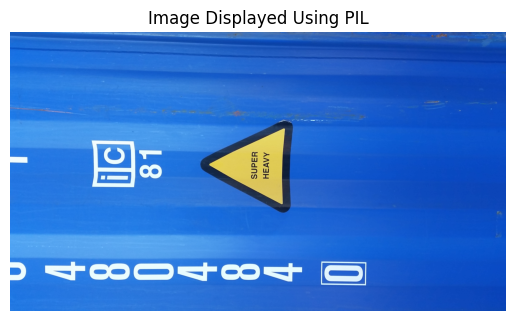

In [27]:
from PIL import Image
import matplotlib.pyplot as plt

# Load and convert the image to RGB using PIL
image_pil = Image.open('heavy.jpg').convert('RGB')

plt.imshow(image_pil)
plt.title('Image Displayed Using PIL')
plt.axis('off')
plt.show()


c) + d) Convert the RGB image to grayscale.

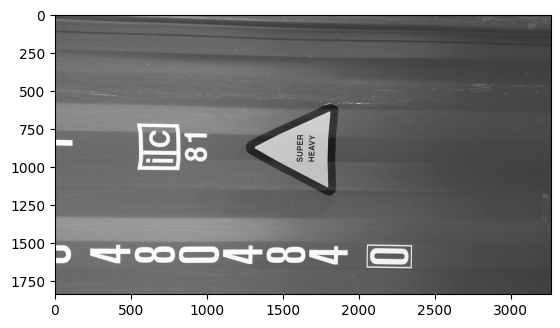

In [28]:
image_gray_pil = image_pil.convert('L')  # 'L' mode is for grayscale

plt.imshow(image_gray_pil, cmap='gray')


e) Compute and display a histogram of the grayscale image. Try at least 2 (or more) different number of bins or bin width. Describe what you see.

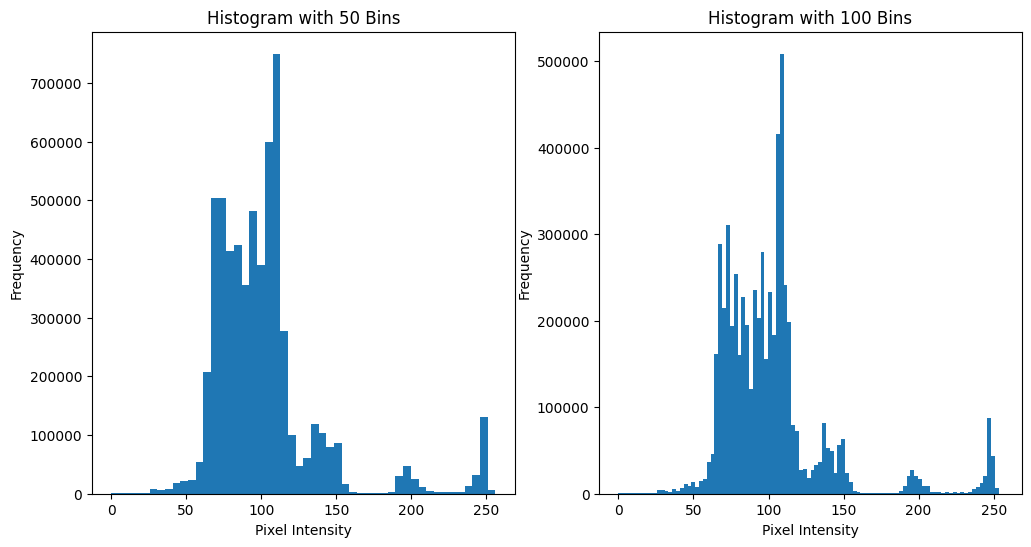

In [29]:
import numpy as np

image_gray_np = np.array(image_gray_pil)

plt.figure(figsize=(12, 6))

# Histogram with 50 bins
plt.subplot(1, 2, 1)
plt.hist(image_gray_np.ravel(), bins=50, range=[0, 256])
plt.title('Histogram with 50 Bins')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Histogram with 100 bins
plt.subplot(1, 2, 2)
plt.hist(image_gray_np.ravel(), bins=100, range=[0, 256])
plt.title('Histogram with 100 Bins')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.show()


f. We now aim to segment the white letters and digits. For this purpose: Define the lower and upper bounds for the values that you want to segment.

g. Retrieve a binary mask. It must have the same width and height as the original image, and should have the value 255 (white) for pixels within the range and 0 (black) for pixels outside the range.

h. display the result

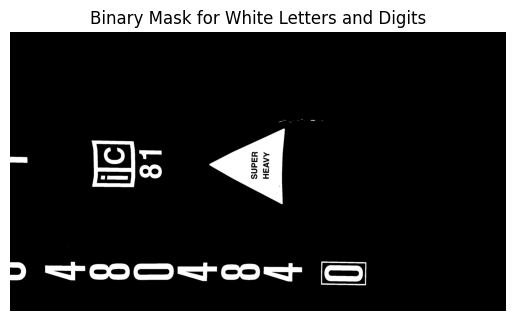

In [30]:
# Define the lower and upper bounds for white (in grayscale)
lower_bound = 185
upper_bound = 255

# Retrieve a binary mask using the same width and height as the original image
binary_mask_pil = np.where((image_gray_np >= lower_bound) & (image_gray_np <= upper_bound), 255, 0)

# Convert the NumPy array back to a PIL image for display
binary_mask_image_pil = Image.fromarray(binary_mask_pil.astype(np.uint8))

# Display the binary mask
plt.imshow(binary_mask_image_pil, cmap='gray')
plt.title('Binary Mask for White Letters and Digits')
plt.axis('off')
plt.show()

i. Describe what you need to be adapt if you wish to segment colours from the RGB image.



#### Work with the RGB channels:
Unlike grayscale images, where segmentation is based on pixel intensity (0–255), color segmentation requires working across all three channels (R, G, and B). hence we will need to define thresholds for each channel (R, G, and B) to isolate the desired color

To segment a specific color (e.g., yellow), you need to identify its range in the RGB space. For yellow:
- The Red channel will have high values (e.g., 200–255).
- The Green channel will also have high values (e.g., 200–255).
- The Blue channel should have lower values (e.g., 0–100).

Instead of using the RGB color space, one might find it easier to use a color space like HSV (Hue, Saturation, Value) or Lab color space. These color spaces separate color information (hue) from intensity (value)

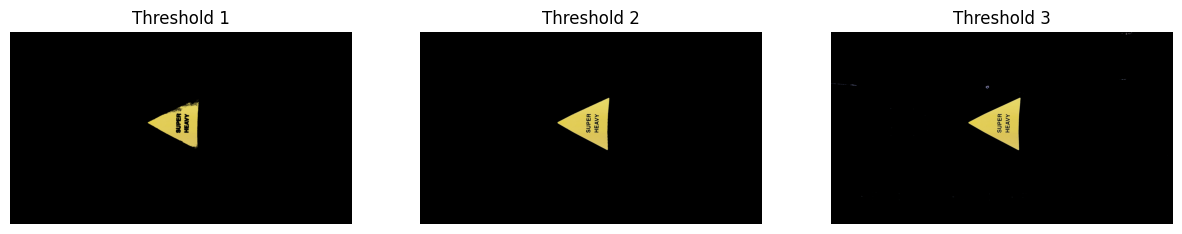

In [31]:
# Convert the RGB image to a NumPy array
image_rgb_np = np.array(image_pil)

# Define three different threshold ranges for yellow segmentation
thresholds = [
    {'lower': [150, 150, 0], 'upper': [255, 255, 100]},  # First threshold for bright yellow
    {'lower': [130, 130, 0], 'upper': [255, 255, 150]},  # Second threshold for slightly darker yellow
    {'lower': [100, 100, 0], 'upper': [255, 255, 180]}   # Third threshold for even darker yellow
]

# Create a plot to display all results
plt.figure(figsize=(15, 5))

# Loop over the thresholds, apply them, and display the results
for i, threshold in enumerate(thresholds):
    lower_bound = np.array(threshold['lower'], dtype=np.uint8)
    upper_bound = np.array(threshold['upper'], dtype=np.uint8)

    # Create a binary mask based on the thresholds
    mask = np.all((image_rgb_np >= lower_bound) & (image_rgb_np <= upper_bound), axis=-1)
    
    # Apply the mask to the original image to keep only yellow areas
    segmented_image = np.where(mask[..., None], image_rgb_np, 0)
    
    # Convert back to a PIL image for display
    segmented_image_pil = Image.fromarray(segmented_image.astype(np.uint8))
    
    # Display the result
    plt.subplot(1, 3, i + 1)
    plt.imshow(segmented_image_pil)
    plt.title(f'Threshold {i + 1}')
    plt.axis('off')

plt.show()